# Passo 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
#import statsmodels.api as sm
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [125]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("dados_investpy.csv", sep = ",")
#dol = pd.read_excel("PredDolarInv4.xlsx")

In [126]:
dol

,Date,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN
0,2007-05-16,1985.0,1985.5,1954.0,1956.0,2062.50,1985.05,10.912,10.470,10.119,4.724,4.6310,4.716,68.01,660.2,82.16,10.7782
1,2007-05-17,1954.5,1969.5,1953.5,1954.5,2068.42,1971.08,10.904,10.200,9.927,4.723,4.6820,4.760,70.27,656.2,82.32,10.8142
2,2007-05-18,1955.0,1972.0,1955.0,1963.0,2070.48,1962.12,10.915,10.250,9.968,4.768,4.7320,4.806,69.42,661.0,82.20,10.8000
3,2007-05-21,1956.0,1961.0,1940.0,1940.5,2074.92,1948.83,10.899,10.250,9.868,4.804,4.7160,4.788,70.49,662.9,82.36,10.7665
4,2007-05-22,1942.0,1948.0,1934.5,1945.5,2075.32,1939.18,10.895,10.200,9.794,4.867,4.7650,4.832,69.52,659.1,82.39,10.7960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,2021-08-30,5200.0,5227.5,5183.0,5185.5,5412.31,5132.74,8.085,9.280,10.265,0.046,0.7675,1.280,73.41,1812.2,92.65,20.1301
4255,2021-08-31,5204.5,5219.5,5138.0,5178.5,5414.46,5126.44,8.095,9.410,10.550,0.046,0.7755,1.307,72.99,1818.1,92.63,20.0630
4256,2021-09-01,5174.0,5218.5,5162.5,5208.0,5413.35,5129.65,8.175,9.495,10.540,0.046,0.7756,1.299,71.59,1816.0,92.45,19.9820
4257,2021-09-02,5190.5,5219.5,5161.5,5205.0,5413.04,5123.46,NaN,NaN,NaN,NaN,NaN,NaN,73.03,1811.5,92.22,NaN


In [127]:
dol["Date"] = pd.to_datetime(dol["Date"]).dt.normalize()
dol = dol.set_index("Date")
dol.head()

,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN
Date,,,,,,,,,,,,,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0,2062.50,1985.05,10.912,10.47,10.119,4.724,4.631,4.716,68.01,660.2,82.16,10.7782
2007-05-17,1954.5,1969.5,1953.5,1954.5,2068.42,1971.08,10.904,10.20,9.927,4.723,4.682,4.760,70.27,656.2,82.32,10.8142
2007-05-18,1955.0,1972.0,1955.0,1963.0,2070.48,1962.12,10.915,10.25,9.968,4.768,4.732,4.806,69.42,661.0,82.20,10.8000
2007-05-21,1956.0,1961.0,1940.0,1940.5,2074.92,1948.83,10.899,10.25,9.868,4.804,4.716,4.788,70.49,662.9,82.36,10.7665
2007-05-22,1942.0,1948.0,1934.5,1945.5,2075.32,1939.18,10.895,10.20,9.794,4.867,4.765,4.832,69.52,659.1,82.39,10.7960


In [128]:
dol.isna().sum().sum()

9220

In [129]:
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

0

In [130]:
dol["BR1Y"] = dol["BR1Y"].pct_change(1)#*100
dol["BR1Y-1"] = dol["BR1Y"].shift(1)
dol["BR1Y-2"] = dol["BR1Y"].shift(2)
dol["BR1Y-3"] = dol["BR1Y"].shift(3)
dol["BR1Y-4"] = dol["BR1Y"].shift(4)
dol["BR1Y-5"] = dol["BR1Y"].shift(5)

dol["BR3Y"] = dol["BR3Y"].pct_change(1)#*100
dol["BR3Y-1"] = dol["BR3Y"].shift(1)
dol["BR3Y-2"] = dol["BR3Y"].shift(2)
dol["BR3Y-3"] = dol["BR3Y"].shift(3)
dol["BR3Y-4"] = dol["BR3Y"].shift(4)
dol["BR3Y-5"] = dol["BR3Y"].shift(5)

dol["BR10Y"] = dol["BR10Y"].pct_change(1)#*100
dol["BR10Y-1"] = dol["BR10Y"].shift(1)
dol["BR10Y-2"] = dol["BR10Y"].shift(2)
dol["BR10Y-3"] = dol["BR10Y"].shift(3)
dol["BR10Y-4"] = dol["BR10Y"].shift(4)
dol["BR10Y-5"] = dol["BR10Y"].shift(5)

dol["US3M"] = dol["US3M"].pct_change(1)#*100
dol["US3M-1"] = dol["US3M"].shift(1)
dol["US3M-2"] = dol["US3M"].shift(2)
dol["US3M-3"] = dol["US3M"].shift(3)
dol["US3M-4"] = dol["US3M"].shift(4)
dol["US3M-5"] = dol["US3M"].shift(5)

dol["US5Y"] = dol["US5Y"].pct_change(1)#*100
dol["US5Y-1"] = dol["US5Y"].shift(1)
dol["US5Y-2"] = dol["US5Y"].shift(2)
dol["US5Y-3"] = dol["US5Y"].shift(3)
dol["US5Y-4"] = dol["US5Y"].shift(4)
dol["US5Y-5"] = dol["US5Y"].shift(5)

dol["US10Y"] = dol["US10Y"].pct_change(1)#*100
dol["US10Y-1"] = dol["US10Y"].shift(1)
dol["US10Y-2"] = dol["US10Y"].shift(2)
dol["US10Y-3"] = dol["US10Y"].shift(3)
dol["US10Y-4"] = dol["US10Y"].shift(4)
dol["US10Y-5"] = dol["US10Y"].shift(5)


dol["OURO"] = dol["OURO"].pct_change(1)#*100
dol["OURO-1"] = dol["OURO"].shift(1)
dol["OURO-2"] = dol["OURO"].shift(2)
dol["OURO-3"] = dol["OURO"].shift(3)
dol["OURO-4"] = dol["OURO"].shift(4)
dol["OURO-5"] = dol["OURO"].shift(5)

dol["DXY"] = dol["DXY"].pct_change(1)#*100
dol["DXY-1"] = dol["DXY"].shift(1)
dol["DXY-2"] = dol["DXY"].shift(2)
dol["DXY-3"] = dol["DXY"].shift(3)
dol["DXY-4"] = dol["DXY"].shift(4)
dol["DXY-5"] = dol["DXY"].shift(5)

dol["BRENT"] = dol["BRENT"].pct_change(1)#*100
dol["BRENT-1"] = dol["BRENT"].shift(1)
dol["BRENT-2"] = dol["BRENT"].shift(2)
dol["BRENT-3"] = dol["BRENT"].shift(3)
dol["BRENT-4"] = dol["BRENT"].shift(4)
dol["BRENT-5"] = dol["BRENT"].shift(5)

dol["MXN"] = dol["MXN"].pct_change(1)#*100
dol["MXN-1"] = dol["MXN"].shift(1)
dol["MXN-2"] = dol["MXN"].shift(2)
dol["MXN-3"] = dol["MXN"].shift(3)
dol["MXN-4"] = dol["MXN"].shift(4)
dol["MXN-5"] = dol["MXN"].shift(5)

In [131]:
per = 1

dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")
#dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)

dol["Retorno"] = dol["Fechamento"].pct_change(per)
dol["Retorno-1"] = dol["Retorno"].shift(1)
dol["Retorno-2"] = dol["Retorno-1"].shift(1)
dol["Retorno-3"] = dol["Retorno-2"].shift(1) 
dol["Retorno-4"] = dol["Retorno-3"].shift(1)
dol["Retorno-5"] = dol["Retorno-4"].shift(1) 

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll5"] = dol["DistBoll"].rolling(5).mean()
dol["MMDistBoll15"] = dol["DistBoll"].rolling(15).mean()
#dol["DistBoll"] = pd.qcut(dol["DistBoll"], 10, labels = False)
dol["DistBoll-1"] = dol["DistBoll"].shift(1)
dol["DistBoll-2"] = dol["DistBoll"].shift(2)
dol["DistBoll-3"] = dol["DistBoll"].shift(3)
dol["DistBoll-4"] = dol["DistBoll"].shift(4)
dol["DistBoll-5"] = dol["DistBoll"].shift(5)

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std15"] = dol["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])

# Direção do dia atual
#dol["dirD"] = np.where(dol["Fechamento"] > dol["Abertura"], 1, 0)
#dol["dirD-1"] = dol["dirD"].shift(1)
#dol["dirD-2"] = dol["dirD"].shift(2)
#dol["dirD-3"] = dol["dirD"].shift(3)
#dol["dirD-4"] = dol["dirD"].shift(4)
#dol["dirD-5"] = dol["dirD"].shift(5)

# Média móvel de 15 dias
dol["MM"] = dol["Fechamento"].rolling(15).mean()

# Zscore
dol["zscore"] = (dol["Fechamento"]-dol["MM"])/dol["std15"]
dol["zscore-1"] = dol["zscore"].shift(1)
dol["zscore-2"] = dol["zscore"].shift(2)
dol["zscore-3"] = dol["zscore"].shift(3)
dol["zscore-4"] = dol["zscore"].shift(4)
dol["zscore-5"] = dol["zscore"].shift(5)

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["MM"])-1


dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])
#dol["Pips-1"] = dol["Pips"].shift(1)
#dol["Pips-2"] = dol["Pips"].shift(2)
#dol["Pips-3"] = dol["Pips"].shift(3)
#dol["Pips-4"] = dol["Pips"].shift(4)
#dol["Pips-5"] = dol["Pips"].shift(5)

In [132]:
dol["std5"] = pd.qcut(dol["std5"], 10, labels = False)
dol["std15"] = pd.qcut(dol["std15"], 10, labels = False)
#dol["DI25"] = pd.qcut(dol["DI25"], 10, labels = False)
#dol["T10USA"] = pd.qcut(dol["T10USA"], 10, labels = False)
dol["prop"] = pd.qcut(dol["prop"], 10, labels = False)
dol["prop-1"] = dol["prop"].shift(1)
dol["prop-2"] = dol["prop"].shift(2)
dol["prop-3"] = dol["prop"].shift(3)
dol["prop-5"] = dol["prop"].shift(4)
dol["prop-4"] = dol["prop"].shift(5)
#dol["MMDistBoll15"] = pd.qcut(dol["MMDistBoll15"], 10, labels = False)

In [133]:
#dol.isna().sum().sum()
dol=dol.dropna(axis=0)

In [134]:
dol = dol.drop(["Abertura", "Fechamento", "Mínima", "Máxima", "MM", 'BollingerSup', 'BollingerInf',], axis = 1)
dol.columns

Index(['BR1Y', 'BR3Y', 'BR10Y', 'US3M', 'US5Y', 'US10Y', 'BRENT', 'OURO',
       'DXY', 'MXN', 'BR1Y-1', 'BR1Y-2', 'BR1Y-3', 'BR1Y-4', 'BR1Y-5',
       'BR3Y-1', 'BR3Y-2', 'BR3Y-3', 'BR3Y-4', 'BR3Y-5', 'BR10Y-1', 'BR10Y-2',
       'BR10Y-3', 'BR10Y-4', 'BR10Y-5', 'US3M-1', 'US3M-2', 'US3M-3', 'US3M-4',
       'US3M-5', 'US5Y-1', 'US5Y-2', 'US5Y-3', 'US5Y-4', 'US5Y-5', 'US10Y-1',
       'US10Y-2', 'US10Y-3', 'US10Y-4', 'US10Y-5', 'OURO-1', 'OURO-2',
       'OURO-3', 'OURO-4', 'OURO-5', 'DXY-1', 'DXY-2', 'DXY-3', 'DXY-4',
       'DXY-5', 'BRENT-1', 'BRENT-2', 'BRENT-3', 'BRENT-4', 'BRENT-5', 'MXN-1',
       'MXN-2', 'MXN-3', 'MXN-4', 'MXN-5', 'Alvo', 'Retorno', 'Retorno-1',
       'Retorno-2', 'Retorno-3', 'Retorno-4', 'Retorno-5', 'DistBoll',
       'MMDistBoll5', 'MMDistBoll15', 'DistBoll-1', 'DistBoll-2', 'DistBoll-3',
       'DistBoll-4', 'DistBoll-5', 'std5', 'std15', 'prop', 'zscore',
       'zscore-1', 'zscore-2', 'zscore-3', 'zscore-4', 'zscore-5', 'RSL',
       'Pips', 'prop-1',

In [135]:
# Treinamento de 2017 a 2020.1
sTrain = "2007-05-16"
eTrain = "2015-12-31"
# Teste de 2020.2 até agora 
sTest = "2016-01-01" #"2020-07-01"
eTest = "2021-07-05"

# dfTrain = dff[dff["Data"] <= eTrain]
# dfTest = dff[dff["Data"] > eTrain]

dfTrain = dol.loc[sTrain : eTrain]
dfTest  = dol.loc[sTest  : eTest]
print(dfTrain.shape)
print(dfTest.shape)

(2456, 91)
(1724, 91)


In [136]:
xTrain = dfTrain.drop(["Alvo"], axis = 1)
yTrain = dfTrain["Alvo"]

xTest = dfTest.drop(["Alvo"], axis = 1)
yTest = dfTest["Alvo"]

In [141]:
mlp = MLPClassifier(hidden_layer_sizes = (200,200,200), max_iter = 200,
                   solver = "sgd", verbose = 10, tol = 1e-8, random_state=42,
                   learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh") # activation = "tanh"

mlp.fit(xTrain, yTrain)

Iteration 1, loss = 0.92173209
Iteration 2, loss = 0.76271477
Iteration 3, loss = 0.69952894
Iteration 4, loss = 0.69153382
Iteration 5, loss = 0.69057388
Iteration 6, loss = 0.68949173
Iteration 7, loss = 0.68864117
Iteration 8, loss = 0.68777465
Iteration 9, loss = 0.68723454
Iteration 10, loss = 0.68686438
Iteration 11, loss = 0.68649408
Iteration 12, loss = 0.68607568
Iteration 13, loss = 0.68584808
Iteration 14, loss = 0.68555023
Iteration 15, loss = 0.68519203
Iteration 16, loss = 0.68495416
Iteration 17, loss = 0.68475165
Iteration 18, loss = 0.68459289
Iteration 19, loss = 0.68448505
Iteration 20, loss = 0.68431664
Iteration 21, loss = 0.68416866
Iteration 22, loss = 0.68398484
Iteration 23, loss = 0.68377613
Iteration 24, loss = 0.68361669
Iteration 25, loss = 0.68348104
Iteration 26, loss = 0.68331112
Iteration 27, loss = 0.68321744
Iteration 28, loss = 0.68311267
Iteration 29, loss = 0.68303114
Iteration 30, loss = 0.68294880
Iteration 31, loss = 0.68278312
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 200, 200),
              learning_rate='adaptive', learning_rate_init=5e-05,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [142]:
predTrain = mlp.predict(xTrain)
predTest = mlp.predict(xTest)

In [143]:
print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[  56 1008]
 [  35 1357]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.62      0.05      0.10      1064
       Baixa       0.57      0.97      0.72      1392

    accuracy                           0.58      2456
   macro avg       0.59      0.51      0.41      2456
weighted avg       0.59      0.58      0.45      2456


Acurácia:  57.533


In [144]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[ 42 655]
 [ 67 960]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.39      0.06      0.10       697
       Baixa       0.59      0.93      0.73      1027

    accuracy                           0.58      1724
   macro avg       0.49      0.50      0.42      1724
weighted avg       0.51      0.58      0.48      1724


Acurácia:  58.121


In [145]:
predTot = mlp.predict(dol.drop(["Alvo"], axis = 1))

In [120]:
dol.loc[:,"Previsto"] = predTot
dol.loc[:,"RetornoMod"] = predTot = dol.loc[:,"Previsto"]*dol["Retorno"]

#simulando um stop de 3%

stop = 0.02
dol.loc[:,"RetornoMod"] = np.where(dol.loc[:,"RetornoMod"] < -stop, stop, dol.loc[:, "RetornoMod"])

dol.loc[:,"RetornoModAcum"] = dol["RetornoMod"].cumsum()

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
dol.loc[:, "RetornoModAcum"].tail()
#dff["RetornoModAcum"].tail()

In [555]:
dol.index.name = "Date"
dol.reset_index(inplace = True)
dol["Date"] = pd.to_datetime(dol["Date"])
dol["TrainTest"] = np.where(dol["Date"] > eTrain,1,-1)

In [556]:
dol.head(1)

,Date,DI25,OURO,WTIBRENT,DXY,MXN,T10USA,BollingerSup,BollingerInf,OURO-1,...,Pips-5,prop-1,prop-2,prop-3,prop-5,prop-4,Previsto,RetornoMod,RetornoModAcum,TrainTest
0,2017-09-20,9.79,1301.15,50.3,91.53,17.64,2.273,3567.13,3459.41,1311.28,...,-11.11,5.0,9.0,0.0,1.0,6.0,0,-0.0,-0.0,-1


In [557]:
#bAgreg = dol.resample("M", on = "Date").sum()
bAgreg = dol.resample("W", on = "Date").sum()
bAgreg.loc[:, "RetornoModAcum"] = bAgreg["RetornoMod"].cumsum()*100

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

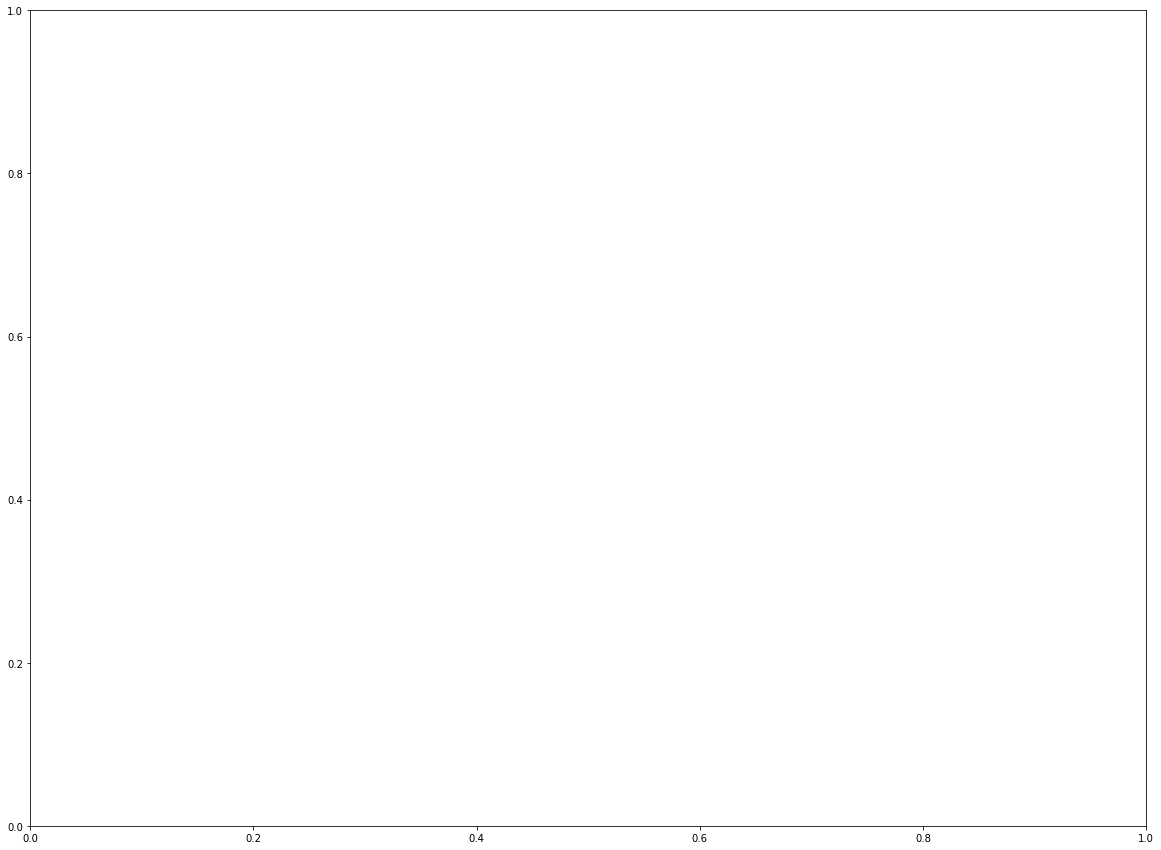

In [559]:
fig,ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["TrainTest"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.RetornoModAcum, c = color, linewidth = lw)
    plt.xlabel("Ano", fontsize = 18)
    plt.ylabel("Retorno Acumulado %", fontsize = 18)
    plt.title("Rede Neural Artificial WIN", fontsize = 24)
    #plt.axvline(x = eTrain, color = "purple", linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text('2007-01-01', 500, "Treinamento 2005-2010", **setup)
    #plt.text("2012-01-01", 500, "Teste: 2011-2020", **setup)
    #plt.text("2008-06-01", 500, "ret total 587%", **setup)
    #plt.text("2008-06-01", 500, "Ret Teste 218%", **setup)
    #plt.text("2011-03-01", 500, "@daltonlbs", **setup)
    
bAgreg.groupby((bAgreg["TrainTest"].shift() * bAgreg["TrainTest"] < 0).cumsum()).apply(grafico)